# Logistic Regression

* Finding best fit on S-curve
    * A : Intercept
    * B : Regression Coefficient
    * e : constant
* Use S-curve to estimate probabilities

$\large p(y_i)=\frac{1}{1+e^{-(A+Bx_i)}}$
    
* Output classification model is probability score 
* Cross entropy is the cost function , it measure how well the estimated probabilities match the actual labels 
* Low cross entropy : probability distribution of Y and Ypredicted in sync 
* High cross entropy : out of sync 
* building classification model , trying to minimise cross entropy 

* metric for classification model:
    * Accuracy
        * compare predicted and actual labels 
        * higher the matches = higher accuracy
        * also, high accuracy but a poor ml model , predictions are useless
    * confusion matrix 
        * predicted labels vs actual label  ( binary classifer )
        
       
|.|Cancer(Predicted Label)|No Cancer(Predicted Label)|
|---|---|---|
|**Cancer**(Actual Label)|TRUE POSITIVE , Actual = Predicted |FALSE NEGATIVE , Actual != Predicted|
|**No Cancer**(Actual Label)|FALSE POSITIVE , Actual != Predicted|TRUE NEGATIVE , Actual = Predicted|

|.|Cancer(Predicted Label)|No Cancer(Predicted Label)|
|---|---|---|
|**Cancer**(Actual Label)|10 |4|
|**No Cancer**(Actual Label)|5|1000|

Accuracy = $\frac{TP + TN}{\text{Num Instances}} = \frac{1010}{1019} = 99.12%$

Precision = $\frac{TP}{TP+FP}=\frac{10}{15}=66.67%$

Recall = $\frac{TP}{TP + FN} = \frac{10}{14} = 71.42%$

$P(fish)$ = .45

If $P_{threshold} = 0$ then Always positive : 

|.|Cancer(Predicted Label)|No Cancer(Predicted Label)|
|---|---|---|
|**Cancer**(Actual Label)|14 |0|
|**No Cancer**(Actual Label)|1005|0|

Recall = 100%

Precision = 13.7%

Classifier not conservation enough

Less conservation , Lower the precision

If $P_{threshold} = 1$ then Always negative : 

|.|Cancer(Predicted Label)|No Cancer(Predicted Label)|
|---|---|---|
|**Cancer**(Actual Label)|0 |14|
|**No Cancer**(Actual Label)|0|1005|

Recall = 0%

Precision = Infinite

Classifier too conservative ( inverted s )

Less conservation , Lower the precision

Precision Recall Tradeoof , choosing Pthreshold 

High Precision Low Recall
High Recall Low Precision

ROC Curve ( Receiver Operating Characteristics )


True Positive Rate vs False Positive Rate 

High True Positive Rate , Low False Positive Rate 

Pick Pthreshold that maximise true positive rate , minimise false positive rate




### Descriptive Analysis , Data Wrangling

In [3]:
import sklearn
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
titanic_df = pd.read_csv('solutions/02/demos/code/datasets/titanic_train.csv')

In [5]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
titanic_df.shape

(891, 12)

In [7]:
titanic_df.drop(['PassengerId','Name','Ticket','Cabin'],'columns',inplace=True)

In [8]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [15]:
titanic_df[titanic_df.isnull().any(axis=1)].count()

Survived    179
Pclass      179
Sex         179
Age           2
SibSp       179
Parch       179
Fare        179
Embarked    177
dtype: int64

In [25]:
titanic_df = titanic_df.dropna()

In [31]:
titanic_df[titanic_df.isnull().any(axis=1)].count()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [33]:
titanic_df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [32]:
titanic_df.shape

(712, 8)

In [34]:
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


Text(0, 0.5, 'Survived')

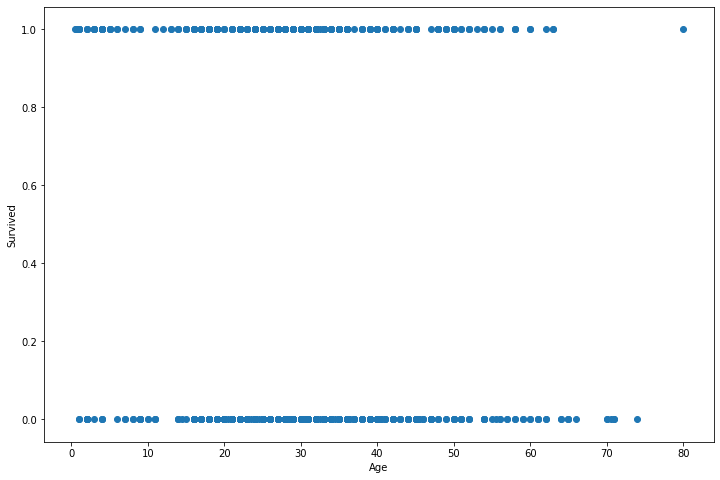

In [35]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(titanic_df['Age'],titanic_df['Survived'])
plt.xlabel('Age')
plt.ylabel('Survived')

Text(0, 0.5, 'Survived')

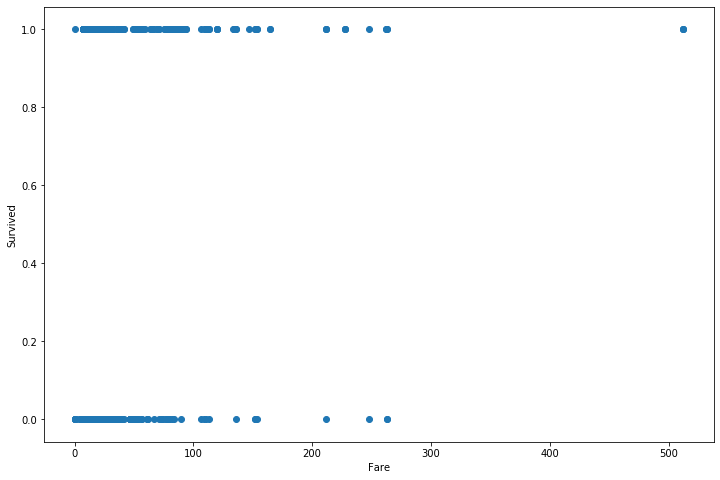

In [36]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(titanic_df['Fare'],titanic_df['Survived'])
plt.xlabel('Fare')
plt.ylabel('Survived')

In [37]:
pd.crosstab(titanic_df['Sex'],titanic_df['Survived'])

Survived,0,1
Sex,,
female,64,195
male,360,93


In [39]:
pd.crosstab(titanic_df['Pclass'],titanic_df['Survived'])

Survived,0,1
Pclass,,
1,64,120
2,90,83
3,270,85


In [40]:
titanic_df_corr = titanic_df.corr()

titanic_df_corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100
Pclass,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893
Age,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143
SibSp,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860
Parch,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624
Fare,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000


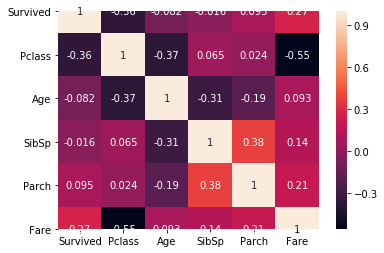

In [46]:
# fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(titanic_df_corr,square=True,annot=True)

In [47]:
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
889,1,1,male,26.0,0,0,30.0000,C


In [ ]:
# label_encoding , ordinal data 
# label_encoding.classes_ , return array of original values of the categorical field 

# nominal data , one-hot encoding 
# pd.get_dummies

In [48]:
from sklearn import preprocessing

label_encoding = preprocessing.LabelEncoder()
titanic_df['Sex'] = label_encoding.fit_transform(titanic_df['Sex'].astype(str))

titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [49]:
titanic_df = pd.get_dummies(titanic_df, columns=['Embarked'])

titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [50]:
titanic_df = titanic_df.sample(frac=1).reset_index(drop=True)

titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,16.0,1,1,20.250,0,0,1
1,0,3,0,18.0,0,0,7.775,0,0,1
2,1,2,1,42.0,0,0,13.000,0,0,1
3,0,3,1,26.0,1,2,20.575,0,0,1
4,1,1,1,27.0,0,0,30.500,0,0,1


### Training

In [51]:
titanic_df = pd.read_csv('solutions/02/demos/code/datasets/titanic_processed.csv')

In [52]:
from sklearn.model_selection import train_test_split

X = titanic_df.drop('Survived',axis=1)
Y = titanic_df['Survived']

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

In [83]:
# l2 default regularization
# Regularize the model by applying a penalty on overly complex model 
# Regularize is a method to penalize complex model , so that model more robust 
# l2 penalty uses l2 norm of the coefficient . l2 norm is a sum of square of the coefficients 
# C is inverse of regularization strength
# C to specify the strength of regularization , smaller value indicate strong regularization 
# algorithm to use in optimization problem , libnear solver ( small dataset )


from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(penalty='l2',C=1.0,solver='liblinear').fit(x_train,y_train)

In [84]:
y_pred = logistic_model.predict(x_test)

In [85]:
pred_results = pd.DataFrame({
    'y_test':y_test,
    'y_pred':y_pred
})

In [86]:
pred_results.head()

,y_test,y_pred
357,0,0
180,0,0
685,0,0
168,1,1
674,0,0


In [87]:
titanic_crosstab = pd.crosstab(pred_results.y_pred,pred_results.y_test)
titanic_crosstab

y_test,0,1
y_pred,,
0,81,15
1,11,36


In [102]:
TP = titanic_crosstab[1][1]
TN = titanic_crosstab[0][0]
FP = titanic_crosstab[0][1]
FN = titanic_crosstab[1][0]

print(
    "TP: {}\nTN: {}\nFP: {}\nFN: {}".format(TP,TN,FP,FN)
)

TP: 36
TN: 81
FP: 11
FN: 15


In [88]:
from sklearn.metrics import accuracy_score, precision_score, recall_score


In [89]:
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)

In [123]:
accuracy_score(y_test,y_pred,normalize=False)

117

In [125]:
117/len(y_test)

0.8181818181818182

In [90]:
print("Accuracy: {}\nPrecision: {}\nRecall: {}".format(acc,prec,recall))

Accuracy: 0.8181818181818182
Precision: 0.7659574468085106
Recall: 0.7058823529411765


In [105]:
"Accuracy: {}".format((TP+TN)/(TP+TN+FP+FN))

'Accuracy: 0.8181818181818182'

In [106]:
"Precision: {}".format(TP/(TP+FP))

'Precision: 0.7659574468085106'

In [108]:
'Recall: {}'.format(TP/(TP+FN))

'Recall: 0.7058823529411765'

Accuracy = $\frac{TP + TN}{\text{Num Instances}}$

Precision = $\frac{TP}{TP+FP}$

Recall = $\frac{TP}{TP + FN}$

### Multipl classification models 

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score, recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [110]:
titanic_df = pd.read_csv('solutions/02/demos/code/datasets/titanic_processed.csv')

In [111]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,14.0,0,0,7.8542,0,0,1
1,1,1,1,28.0,0,0,26.5500,0,0,1
2,1,1,0,36.0,1,2,120.0000,0,0,1
3,0,3,1,17.0,1,0,7.0542,0,0,1
4,0,3,1,4.0,4,2,31.2750,0,0,1


In [113]:
FEATURES = titanic_df.columns.tolist()[1:]

In [114]:
result_dict = {}



In [115]:
def summarize_classification(y_test,y_pred):
    
    acc = accuracy_score(y_test,y_pred,normalize=True)
    num_acc =accuracy_score(y_test,y_pred,normalize=False) # accurate count
    
    prec = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    
    return {
        'accuracy':acc,
        'precision':prec,
        'recall':recall,
        'accuracy_count':num_acc
    }

In [116]:
def build_model(classifier_fn,
                name_of_y_col,
                name_of_x_cols,
                dataset,
                test_frac=0.2
               ):
    X = dataset[name_of_x_cols]
    Y = dataset[name_of_y_col]
    
    x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=test_frac)
    
    model = classifier_fn(x_train,y_train)
    y_pred = model.predict(x_test)
    
    y_pred_train = model.predict(x_train)
    
    
    train_summary = summarize_classification(y_train,y_pred_train)
    test_summary = summarize_classification(y_test,y_pred)
    
    pred_results = pd.DataFrame({
        'y_test':y_test,
        'y_pred':y_pred
    })
    
    model_crosstab = pd.crosstab(pred_results.y_pred,pred_results.y_test)
    
    return {
        'training':train_summary,
        'test':test_summary,
        'confusion_matrix':model_crosstab
    }

In [117]:
def compare_results():
    for key in result_dict:
        print('Classification: ',key)
        print()
        print('Training data')
        for score in result_dict[key]['training']:
            print(score,result_dict[key]['training'][score])
            
        print()
        print('Test data')
        for score in result_dict[key]['test']:
            print(score,result_dict[key]['test'][score])
            
        print()
        
        
        
        

In [118]:
def logistic_fn(x_train,y_train):
    model = LogisticRegression(solver='liblinear')
    model.fit(x_train,y_train)
    
    return model

In [119]:
result_dict['survived - logistic'] = build_model(
    logistic_fn,
    'Survived',
    FEATURES,
    titanic_df
)

In [120]:
compare_results()

Classification:  survived - logistic

Training data
accuracy 0.8101933216168717
precision 0.8090452261306532
recall 0.696969696969697
accuracy_count 461

Test data
accuracy 0.7622377622377622
precision 0.6949152542372882
recall 0.7192982456140351
accuracy_count 109

